In [ ]:
#Étape 1 : Importer les packages
#Étape 2 : Charger les données
#Étape 3 : Analyse de données
#Étape 4 : Pretraitement des donnees
#Étape 5 : Diviser les donnees : Train et Test
#Étape 6 : Selection au moins 4 Algorithms de Machine Learning
#Étape 7 : Evaluer les modèles
#Étape 8 : Faire une simple prediction

In [ ]:
#1 Importer les packages 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
#Importer la dataset

In [4]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#2 Etape de prétraitement des données

In [5]:
data['Genre'] = np.where(data['Genre'] == 'Male', 1, 0)

In [6]:
# Extraction de variables indépendantes
X = data.iloc[:, 3:5].values

In [ ]:
#3 Trouver le nombre optimal de clusters à l'aide de la méthode du coude

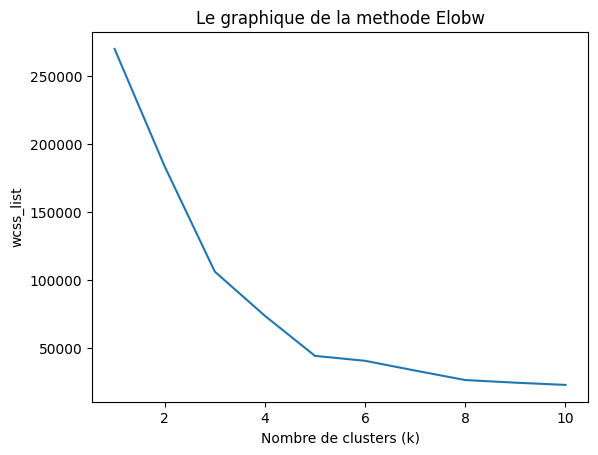

In [19]:
#trouver le nb optimal de clusters en utilisant la methode du coudes 
from sklearn.cluster import KMeans
wcss_list= [] #Initialisation de la liste des valeurs de WCSS
#Utilisation de la boucle for pour les itérations de 1 à 10.
for i in range (1, 11):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Le graphique de la methode Elobw')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('wcss_list')
plt.show()


In [20]:
# 4 Entrainement de l'algorithme K-means
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
# Prediction de cluster
y_predict= kmeans.fit_predict(X)

In [21]:
y_predict

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [22]:
#5 Visualisation des clusters

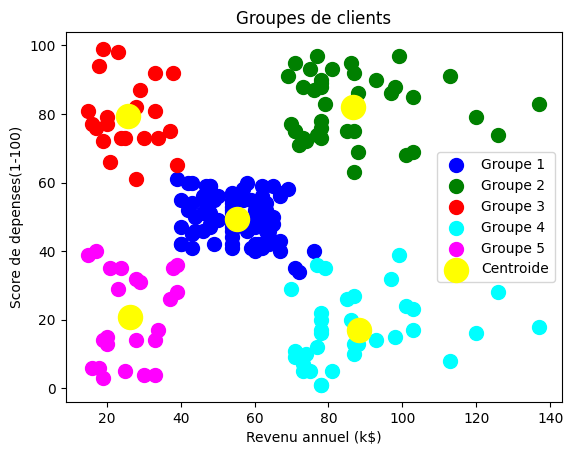

In [27]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Groupe 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Groupe 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Groupe 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Groupe 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Groupe 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s= 300, c = 'yellow', label ='Centroide')
plt.title('Groupes de clients')
plt.xlabel('Revenu annuel (k$)')
plt.ylabel('Score de depenses(1-100)')
plt.legend()
plt.show()
